<a href="https://colab.research.google.com/github/ykamen/CS4342/blob/main/CS4342_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from google.colab import files

In [194]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
tr_labels = np.load('drive/MyDrive/fashion_mnist_train_labels.npy', 'r')
tr_images = np.load('drive/MyDrive/fashion_mnist_train_images.npy', 'r') / 255.0
te_images = np.load('drive/MyDrive/fashion_mnist_test_images.npy', 'r') / 255.0
te_labels = np.load('drive/MyDrive/fashion_mnist_test_labels.npy', 'r')

In [196]:
def append1s(imgs):
  rowof1s = np.ones((imgs.shape[0],1))
  Xtilde = np.hstack((imgs,rowof1s))
  return Xtilde

def initws(imgs,n_ws):
  w = np.zeros((imgs.shape[1],n_ws))
  for i in range(n_ws):
    wi = 1e-5 * np.random.randn(imgs.shape[1])
    w[:,i] = wi
  return w

def softmax(xtilde,ws):
  Z = xtilde.dot(ws)
  yhat = np.exp(Z)
  for i in range(Z.shape[0]):
    temp = np.sum(yhat[i],axis=0)
    yhat[i] = yhat[i]/temp
  return yhat

def onehot(labels):
  n_values = np.max(labels) + 1
  onehotys = np.eye(n_values)[labels]
  return onehotys

def SGD(trImages, trLabels, epsilon, batchSize, n_ws, alpha=.01):
  a = trLabels.shape[0] / batchSize
  xtilde = append1s(trImages)
  xt = xtilde.T
  wtilde = initws(xtilde, n_ws)
#  for i in range(10):
  indeces = np.arange(trLabels.shape[0])
  np.random.shuffle(indeces)
  y = onehot(trLabels)
  ind = np.split(indeces,a)
  for i in range(int(a)):
    yhat0 = softmax(xtilde,wtilde)
    batchyhat = yhat0[ind[i]]
    batchy = y[ind[i]]
    batchx = xt[:,ind[i]]
    tempgrad = (batchx.dot(batchyhat-batchy))/batchSize
    l2w = wtilde
    l2w[-1] = 0
    fingrad = epsilon*(tempgrad + alpha*l2w/batchSize)
    wtilde = wtilde - fingrad
    if (i >= (int(a)-20)):
      wt = wtilde.T
      temp1 = np.sum(batchy*np.log(batchyhat))/(-batchSize)
      temp2 = np.sum(wt.dot(l2w))*alpha/(2*batchSize)
      print(f"Loss at batch {i+1} is {temp1-temp2}")
  return wtilde

def plotw(w):
  fin = w[:-1]
  return plt.imshow(fin.reshape(28,28))

def pc(ws, teIm, teLa):
  a = softmax(teIm,ws)
  c = 0
  for i in range(teIm.shape[0]):
    if np.argmax(a[i]) == teLa[i]:
      c = c+1
  return c/teIm.shape[0]

In [197]:
w = SGD(tr_images,tr_labels,.1,100,10)

Loss at batch 581 is 0.5308490279704817
Loss at batch 582 is 0.5445608674069773
Loss at batch 583 is 0.46141836730793184
Loss at batch 584 is 0.4935063853244678
Loss at batch 585 is 0.515461799699338
Loss at batch 586 is 0.4284822263812743
Loss at batch 587 is 0.6068943466967928
Loss at batch 588 is 0.6389917280339387
Loss at batch 589 is 0.6402212923202105
Loss at batch 590 is 0.4881106252801048
Loss at batch 591 is 0.48669773618211243
Loss at batch 592 is 0.6114705173950878
Loss at batch 593 is 0.5591002061016606
Loss at batch 594 is 0.7283128677159356
Loss at batch 595 is 0.44982246713492646
Loss at batch 596 is 0.574376210941493
Loss at batch 597 is 0.587599440197663
Loss at batch 598 is 0.6201960584350487
Loss at batch 599 is 0.48288352162648135
Loss at batch 600 is 0.5486512918517309


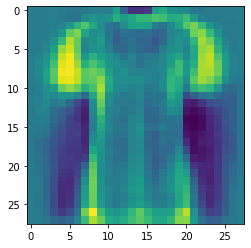

In [198]:
plotw(w[:,0])

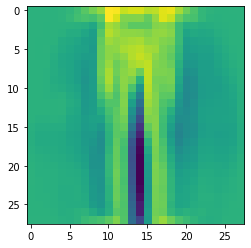

In [199]:
plotw(w[:,1])

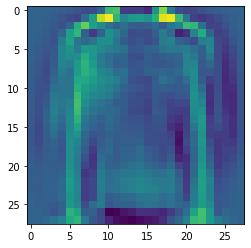

In [200]:
plotw(w[:,2])

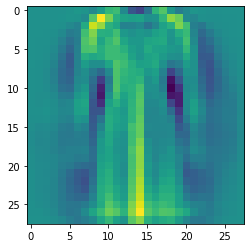

In [201]:
plotw(w[:,3])

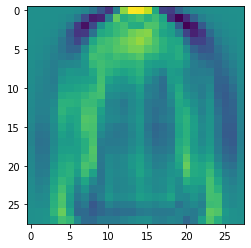

In [202]:
plotw(w[:,4])

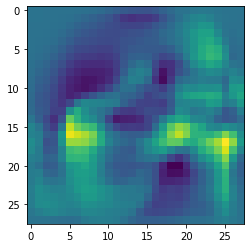

In [203]:
plotw(w[:,5])

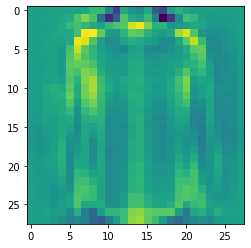

In [204]:
plotw(w[:,6])

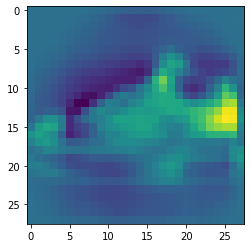

In [205]:
plotw(w[:,7])

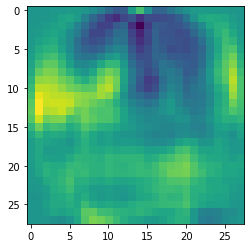

In [206]:
plotw(w[:,8])

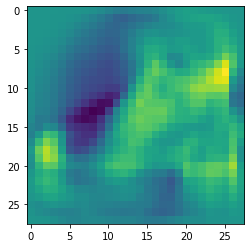

In [207]:
plotw(w[:,9])

In [208]:
pc(w,append1s(te_images),te_labels)

0.8108

## Problem 2. Solving the titanic dataset

In [209]:
data = pd.read_csv(r'drive/MyDrive/tit_train.csv', on_bad_lines='skip')
tr_tit = pd.DataFrame(data, columns= ['Survived','Pclass','Sex','SibSp'])
tr_tit.replace(['female','male'],[1,0],inplace=True)
data = pd.read_csv(r'drive/MyDrive/tit_test.csv', on_bad_lines='skip')
te_tit = pd.DataFrame(data, columns= ['PassengerId','Pclass','Sex','SibSp'])
te_tit.replace(['female','male'],[1,0],inplace=True)

In [210]:
print(te_tit)

     PassengerId  Pclass  Sex  SibSp
0            892       3    0      0
1            893       3    1      1
2            894       2    0      0
3            895       3    0      0
4            896       3    1      1
..           ...     ...  ...    ...
413         1305       3    0      0
414         1306       1    1      0
415         1307       3    0      0
416         1308       3    0      0
417         1309       3    0      1

[418 rows x 4 columns]


In [211]:
print(tr_tit)

     Survived  Pclass  Sex  SibSp
0           0       3    0      1
1           1       1    1      1
2           1       3    1      0
3           1       1    1      1
4           0       3    0      0
..        ...     ...  ...    ...
886         0       2    0      0
887         1       1    1      0
888         0       3    1      1
889         1       1    0      0
890         0       3    0      0

[891 rows x 4 columns]


In [114]:
tit_xtilde = tr_tit[['Pclass','Sex','SibSp']].to_numpy(copy=True)

In [150]:
te_tit_x = te_tit[['Pclass','Sex','SibSp']].to_numpy(copy=True)

In [140]:
tit_y = tr_tit['Survived'].to_numpy(copy=True)

In [151]:
te_tit_id = te_tit['PassengerId'].to_numpy(copy=True)

In [190]:
# doesn't have append1s
def SGD2(trImages, trLabels, epsilon, batchSize, n_ws, alpha=.01):
  a = trLabels.shape[0] / batchSize
  xtilde = trImages
  xt = xtilde.T
  wtilde = initws(xtilde, n_ws)
#  for i in range(10):
  indeces = np.arange(trLabels.shape[0])
  np.random.shuffle(indeces)
  y = onehot(trLabels)
  ind = np.split(indeces,a)
  for i in range(int(a)):
    yhat0 = softmax(xtilde,wtilde)
    batchyhat = yhat0[ind[i]]
    batchy = y[ind[i]]
    batchx = xt[:,ind[i]]
    tempgrad = (batchx.dot(batchyhat-batchy))/batchSize
    fingrad = epsilon*(tempgrad + alpha*wtilde/batchSize)
    wtilde = wtilde - fingrad
  return wtilde

#larger deviation
def initws2(imgs,n_decisions):
  w = np.zeros((imgs.shape[1],n_decisions))
  for i in range(n_decisions):
    wi = 1e-2 * np.random.randn(imgs.shape[1])
    w[:,i] = wi
  return w

#create final csv. I tried to transform all the final values to int
#but it keeps exporting it into csv as float with e. I just changed
# it by hand in the excel file.
# Also was too lazy to add the column with names.
def tit_csv(ws, tit_test, id):
  temp = np.zeros(id.shape[0])
  fin_csv = np.vstack((id, temp)).T
  a = softmax(tit_test, ws)
  for i in range(tit_test.shape[0]):
    fin_csv[i,1] = np.argmax(a[i])
  int_fin = fin_csv.astype(int)
  np.savetxt("tit_fin.csv", int_fin, delimiter=",")
  files.download("tit_fin.csv")
  pass

In [142]:
tit_wfinal = SGD2(tit_xtilde,tit_y,.1,27,2)

In [192]:
tit_csv(tit_wfinal,te_tit_x,te_tit_id)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>